## Import Libraries

In [60]:
#pip install "scikit-learn<1.2"


In [61]:
#conda install scikit-learn=1.1.3

In [154]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Our Goal: to predict the price given a set of attributes.

## Load the Data

In [155]:
from sklearn import datasets
boston = pd.read_csv('df_boston.csv')


In [156]:
X_boston,y_boston = boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']] , boston['Price']
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [157]:
#print('Keys:', boston.keys())
#print('Feature names:',boston.feature_names)
boston.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [158]:
boston.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [159]:
#print(boston.DESCR)
boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    int64  
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  Price       506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


## EDA (Exploratory Data Analysis)

## Q1: Create a dataframe and Save that dataset inside it.

In [160]:
df_boston = pd.DataFrame(boston)
df_boston = df_boston.drop(['Unnamed: 0'], axis=1, errors='ignore')


## Q2: Print the head rows of the dataframe.

In [161]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Q3: Use histogram to show the distribution of House Prices.

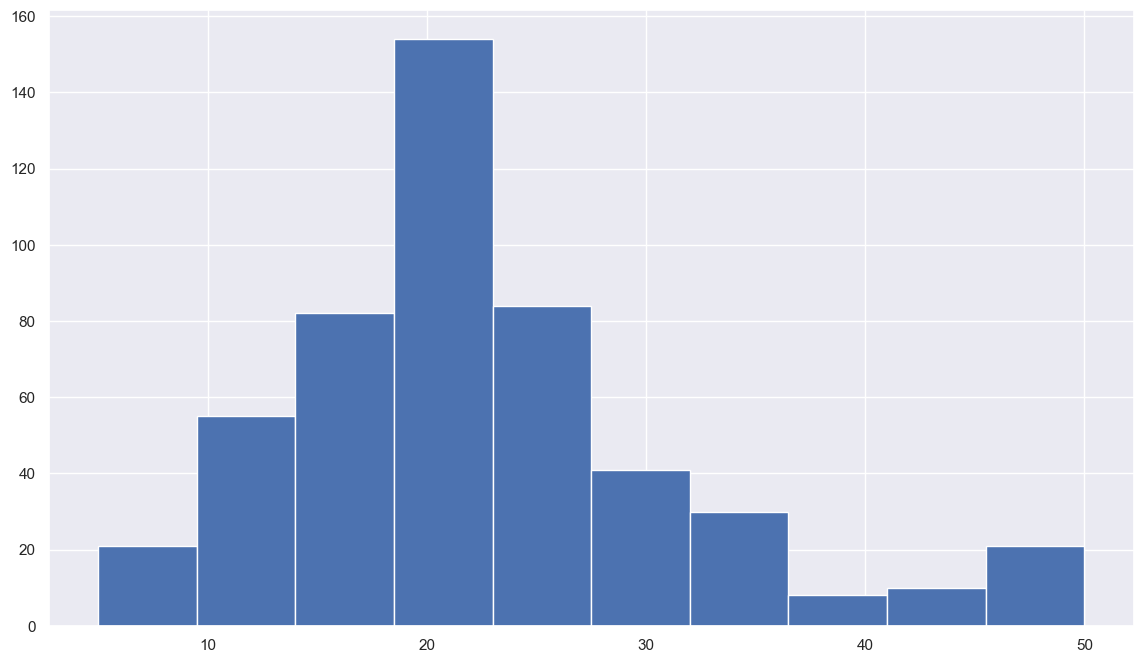

In [162]:
plt.hist(df_boston['Price'])
plt.show()

## Q4: Use a heatmap to show the correlation between features and the target labels.

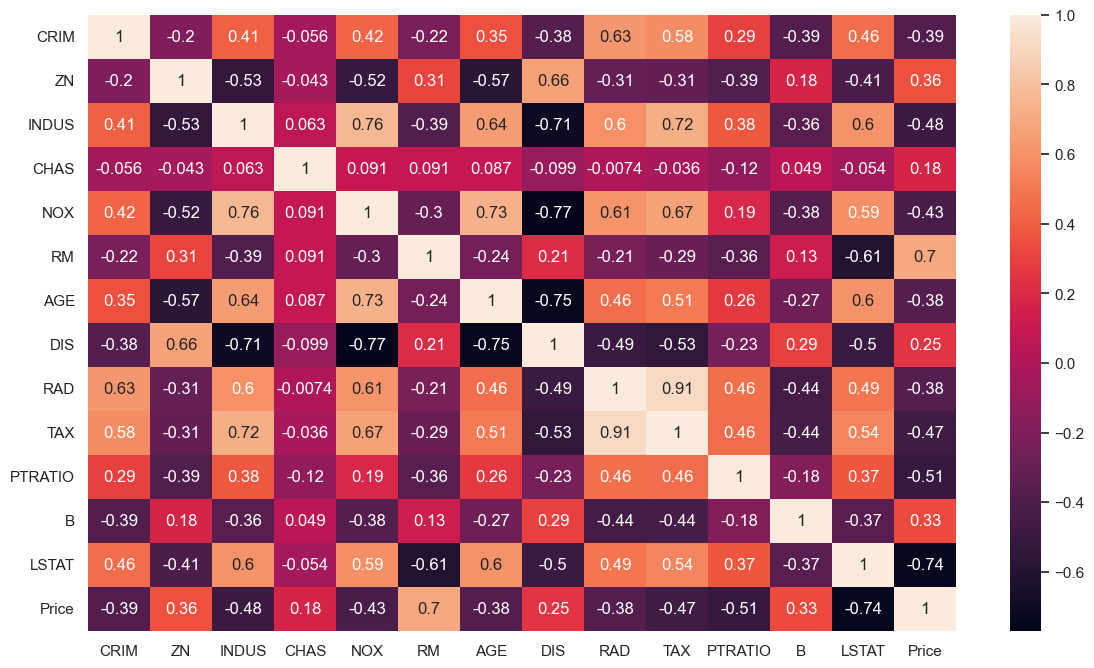

In [163]:
sns.set(rc = {'figure.figsize':(14,8)})
sns.heatmap(df_boston.corr(), annot=True, linewidths=0);


In [164]:
df_boston.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Q5: Use a lmplot to draw the relations between price and LSTAT.

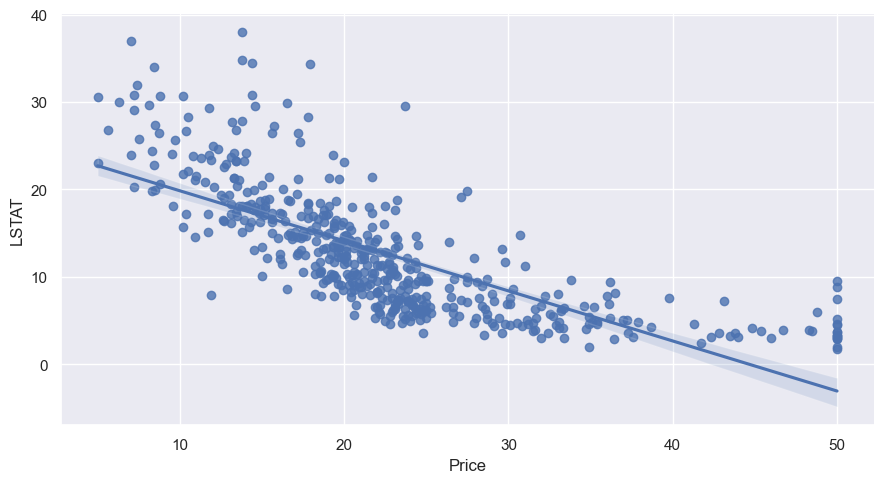

In [165]:
sns.lmplot(df_boston, x="Price", y="LSTAT", aspect =1.80, height=5)
#I could'nt change the background into white.

## Q6: Use a lmplot to draw the relations between price and RM.

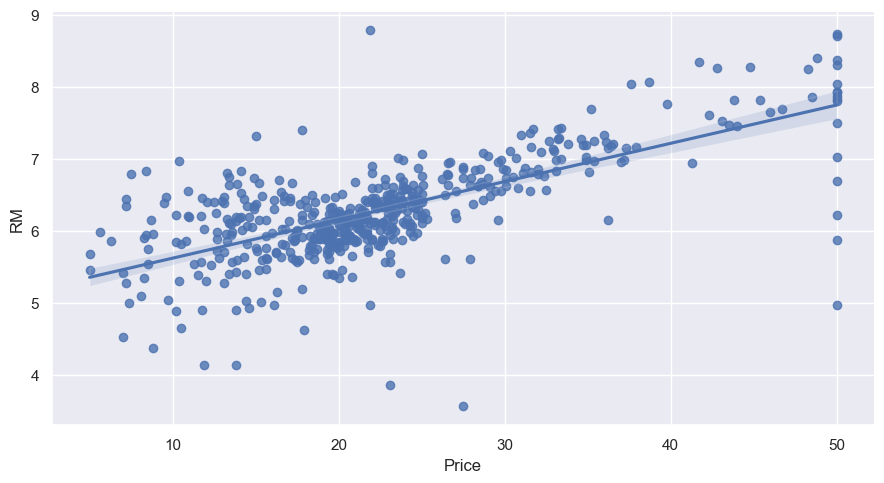

In [166]:
sns.lmplot(df_boston, x="Price", y="RM", aspect =1.80, height=5)
#I could'nt change the background into white.

In [167]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

## Q7: Split the dataset into Train and Test sets with test_size=30% and random_state=23.

In [168]:
#pip install -U scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.3, random_state=23)

## Q8: Build a Linear Regression Model.

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
lm = LinearRegression()

## Q9: Train the Model.

In [173]:
lm.fit(X_train,y_train)

LinearRegression()

## Q10: Evaluate the model. 
- print intercept and coefficients.
- compare between predictions and real values, then visualize them.
- Draw Residual Histogram.

In [174]:
print(lm.intercept_) 

27.789606703250975


In [175]:
coeff_df = pd.DataFrame(lm.coef_,X_boston.columns,columns=['Coefficient'])
coeff_df


,Coefficient
CRIM,-0.093418
ZN,0.043303
INDUS,-0.022522
CHAS,3.342047
NOX,-16.330196
RM,4.271930
AGE,0.000721
DIS,-1.403231
RAD,0.255429
TAX,-0.007482


In [176]:
predictingV = lm.predict(X_test)
predictingV

array([25.48882634, 26.85383326, 26.50113697, 16.8311552 , 38.90548232,
       15.92640789, 19.23152198, 29.28806615, 33.79428877, 38.25894258,
       16.19079976, 27.79685578, 25.35181876, 25.61234607, 21.35214307,
       19.1221877 , 31.34939126, 31.18316962, 29.08034579, 28.90724661,
       19.59636559, 17.90783181, 24.98877865, 24.00154542, 13.56628155,
       22.08791583, 32.99232593, 28.36965015, 29.65108026, 39.94060342,
       18.66689308, 14.92285788, 19.6923896 , 19.20029267, 20.14718966,
       37.91700834, 24.21072339, 30.86942899, 13.24009483, 36.42525089,
        8.97985188, 13.88836303, 11.78208526, 19.61208754, 36.32061974,
       20.01573887, 11.5591671 , 21.66102362, 13.54102458, 39.34825195,
       22.51984897,  2.71613802, 17.75797283, 18.44448789, 24.04115464,
       32.92544769,  5.97982079, 21.7327963 , 17.46853879, 22.60218768,
       17.64957037, 21.74406196, 21.65178897, 43.91766166, 30.82382874,
       29.34034013, 21.19730767, 16.86447485, 31.17198257, 13.38

In [177]:
RealV= np.array(y_test)
RealV

array([23.2, 22.1, 20.6, 17.8, 41.7, 17.2, 20.5, 31.2, 32. , 37.6, 13.3,
       24.5, 19.4, 23.8, 21. , 15.6, 37. , 23.6, 23.6, 22.8, 19.9, 23.2,
       24.6, 23.4, 17.2, 26.4, 37.2, 24.4, 25. , 21.9, 12.7, 14.1, 27.5,
       18.8, 27.9, 48.3, 25. , 32.5, 13.5, 36. , 17.8, 11.3, 15.6, 18.2,
       50. , 20. , 13.1, 19.3, 10.5, 43.5, 20.6,  8.8, 18.1, 14.2, 19.2,
       27.5,  7.4, 19.3, 22.5, 21.4, 19.6, 20.7, 24.1, 50. , 25.1, 24.1,
       13.1,  8.5, 24.8, 11. , 17.7, 13.8, 19.8, 16.1, 17.3, 13.3, 10.4,
       19.4, 12.3, 27.9, 23.1, 18.5, 30.1, 16.3, 25. , 19. , 33.2, 50. ,
       24.3, 13.4, 20.2, 18.3, 16.7, 18.5, 21.9, 14. , 50. , 18.6, 22. ,
       23.8, 13.9, 19.8, 29.4, 50. , 16. , 20.4, 29.8, 24.7, 13.3, 12.1,
       23. , 12.5, 30.7, 22.2, 29.6, 24.8, 12.7, 19.6, 21.6, 21.7, 22.5,
       19.9, 18.4, 27.5, 23.1, 15. , 18.4, 18.8, 22. ,  7.2, 24.6, 20.9,
       17.9, 19.7, 16.1, 20.8, 23.8, 16.6, 21.7, 50. , 15.6, 29.9, 33.3,
       10.5, 16.5, 31.7, 34.7, 28.1, 13.8,  8.7, 35

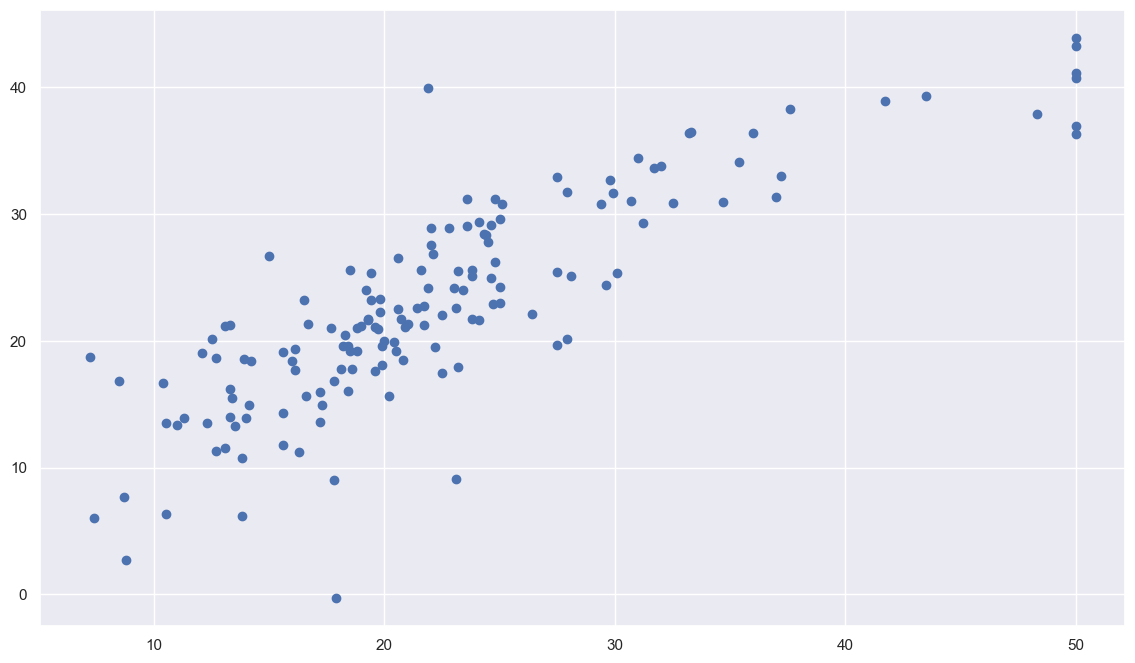

In [178]:
plt.scatter(RealV,predictingV); # Quite positive

## Residual Histogram

<Axes: xlabel='Price', ylabel='Density'>

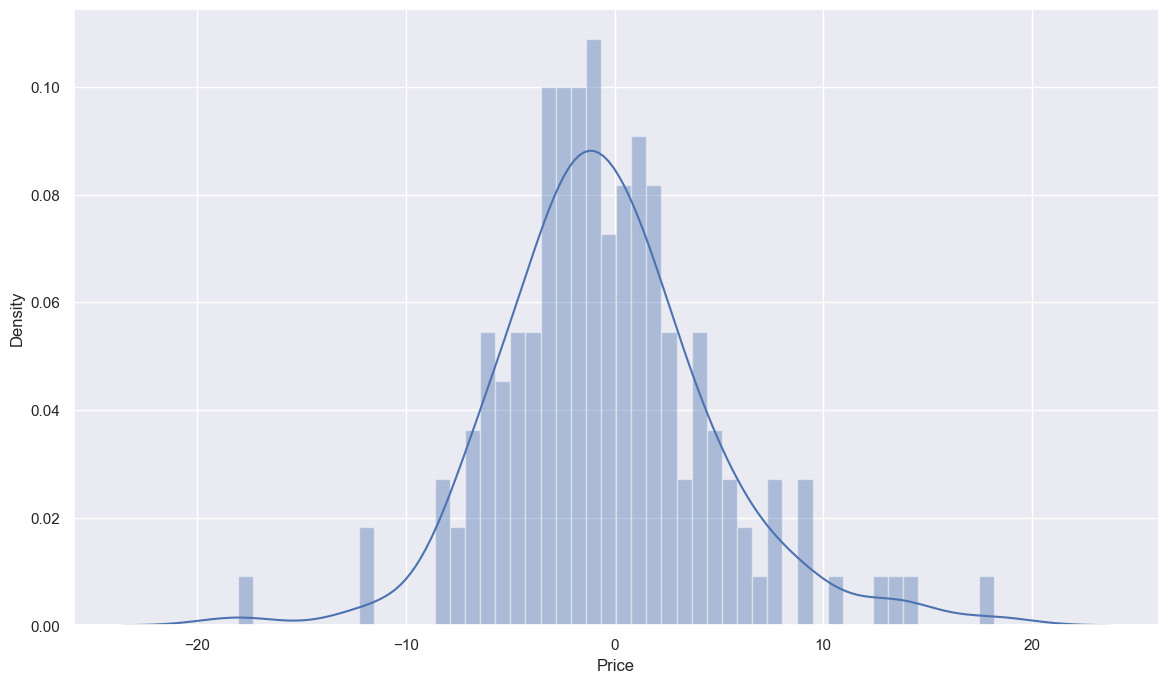

In [179]:
sns.distplot((y_test-predictions),bins=50) #Normally distributed 

## Q11: Use evaluation metrics MAE, MSE, RMSE and R^2.

In [180]:
from sklearn import metrics

In [185]:
print('MAE:', metrics.mean_absolute_error(y_test, predictingV))
print('MSE:', metrics.mean_squared_error(y_test, predictingV))
Rmse = np.sqrt(metrics.mean_squared_error(y_test, predictingV))
print('RMSE: ', Rmse)

MAE: 3.782429511205026
MSE: 25.358577194006983
RMSE:  5.035730055712576


In [186]:
 from sklearn.metrics import r2_score

In [188]:
r2_score(RealV, predictingV)

0.6947991644651348